In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('CWC23_all_innings.csv')

In [3]:
df.head()

,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
0,PAK,Shaheen Shah Afridi (PAK),bowl,60,45,3.0,0.05,0.750000,v South Africa,Chennai,27-Oct-23,10.0,0.0,4.5,2,NaN,NaN,NaN,NaN,NaN
1,ENG,DJ Willey (ENG),bowl,60,45,3.0,0.05,0.750000,v India,Lucknow,29-Oct-23,10.0,2.0,4.5,1,NaN,NaN,NaN,NaN,NaN
2,NZ,MJ Henry (NZ),bowl,60,48,3.0,0.05,0.800000,v England,Ahmedabad,5-Oct-23,10.0,1.0,4.8,1,NaN,NaN,NaN,NaN,NaN
3,NZ,LH Ferguson (NZ),bowl,60,49,3.0,0.05,0.816667,v Bangladesh,Chennai,13-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN
4,AFG,Noor Ahmad (AFG),bowl,60,49,3.0,0.05,0.816667,v Pakistan,Chennai,23-Oct-23,10.0,0.0,4.9,1,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [5]:
df.describe()

,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,overs,mdns,econ,inns,4s,6s,sr,not_out,mins
count,1408.000000,1408.000000,562.000000,1408.000000,1408.000000,562.000000,562.000000,562.000000,1408.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,35.305398,33.237216,1.204626,0.070574,0.898755,7.342527,0.256228,5.946637,1.470881,2.605201,0.751773,83.716596,0.151300,42.721040
std,25.248709,28.056329,1.198237,0.152535,0.471051,2.679736,0.532547,2.141566,0.499329,3.146922,1.504184,52.475444,0.358553,41.576908
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,1.350000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.750000,11.000000,0.000000,0.010724,0.621350,5.550000,0.000000,4.500000,1.000000,0.000000,0.000000,51.610000,0.000000,12.000000
50%,32.000000,29.000000,1.000000,0.032258,0.879005,8.000000,0.000000,5.675000,1.000000,2.000000,0.000000,81.810000,0.000000,28.000000
75%,54.000000,49.000000,2.000000,0.062500,1.130819,10.000000,0.000000,7.120000,2.000000,4.000000,1.000000,107.020000,0.000000,60.000000
max,143.000000,201.000000,7.000000,1.000000,6.000000,10.000000,3.000000,16.000000,2.000000,21.000000,11.000000,600.000000,1.000000,217.000000


In [6]:
# Frequency counts for categorical features
for column in df.select_dtypes(include='object').columns:
    print("\n", column)
    print(df[column].value_counts())


 team
NED    157
AUS    155
ENG    151
NZ     144
BAN    141
SA     141
SL     138
AFG    129
PAK    128
IND    124
Name: team, dtype: int64

 player
GD Phillips (NZ)    19
R Ravindra (NZ)     19
A Dutt (NED)        18
AU Rashid (ENG)     18
PJ Cummins (AUS)    18
                    ..
LB Williams (SA)     1
R Ashwin (IND)       1
SA Abbott (AUS)      1
AT Carey (AUS)       1
SA Yadav(IND)        1
Name: player, Length: 152, dtype: int64

 bat_or_bowl
bat     846
bowl    562
Name: bat_or_bowl, dtype: int64

 opposition
v India           166
v South Africa    163
v Australia       152
v New Zealand     144
v Pakistan        139
v England         134
v Netherlands     134
v Afghanistan     130
v Bangladesh      123
v Sri Lanka       123
Name: opposition, dtype: int64

 ground
Dharamsala      156
Eden Gardens    156
Delhi           153
Lucknow         149
Wankhede        148
Chennai         145
Bengaluru       144
Pune            142
Ahmedabad       117
Hyderabad        98
Name: ground,

In [7]:
# Check for missing values
df.isnull().sum()

team                 0
player               0
bat_or_bowl          0
bb_bf                0
runs                 0
wkts               846
wicketball_prob      0
runs_per_ball        0
opposition           0
ground               0
start_date           0
overs              846
mdns               846
econ               846
inns                 0
4s                 562
6s                 562
sr                 562
not_out            562
mins               562
dtype: int64

# ---Team Performance Analysis---

***Average Runs Scored***

Text(0, 0.5, 'Average Runs Scored')

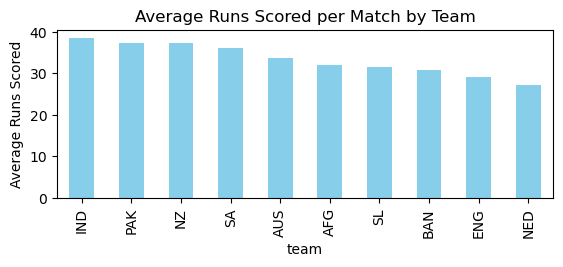

In [8]:
# Group data by team
team_stats = df.groupby('team')
# Calculate average runs scored per match for each team
avg_runs_scored = team_stats['runs'].mean()
# Plot average runs scored
plt.subplot(2, 1, 1)
avg_runs_scored.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Runs Scored per Match by Team')
plt.ylabel('Average Runs Scored')

***Average Wickets Taken***

Text(0, 0.5, 'Average Wickets Taken')

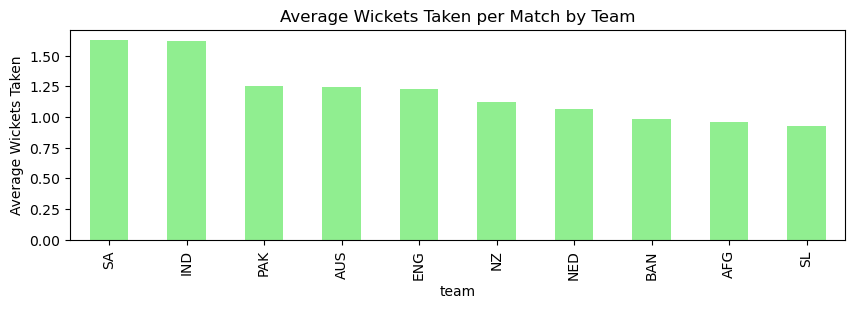

In [9]:
# Calculate average wickets taken per match for each team
avg_wickets_taken = team_stats['wkts'].mean()
# Plotting
plt.figure(figsize=(10, 6))
# Plot average wickets taken
plt.subplot(2, 1, 2)
avg_wickets_taken.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Average Wickets Taken per Match by Team')
plt.ylabel('Average Wickets Taken')

***Batting-Bowling styles***

In [10]:
# Analyzing batting and bowling styles
batting_style = df[df['bat_or_bowl'] == 'bat'].groupby('team')['bat_or_bowl'].apply(lambda x: x.unique())
bowling_style = df[df['bat_or_bowl'] == 'bowl'].groupby('team')['bat_or_bowl'].apply(lambda x: x.unique())
# Display batting and bowling styles
print("\nBatting Styles by Team:")
print(batting_style)

print("\nBowling Styles by Team:")
print(bowling_style)


Batting Styles by Team:
team
AFG    [bat]
AUS    [bat]
BAN    [bat]
ENG    [bat]
IND    [bat]
NED    [bat]
NZ     [bat]
PAK    [bat]
SA     [bat]
SL     [bat]
Name: bat_or_bowl, dtype: object

Bowling Styles by Team:
team
AFG    [bowl]
AUS    [bowl]
BAN    [bowl]
ENG    [bowl]
IND    [bowl]
NED    [bowl]
NZ     [bowl]
PAK    [bowl]
SA     [bowl]
SL     [bowl]
Name: bat_or_bowl, dtype: object


***Top performing Teams***

In [11]:
# Identify top-performing teams
top_teams = avg_runs_scored.nlargest(3).index.tolist()
print("\nTop-performing Teams:")
for team in top_teams:
    print("-", team)


Top-performing Teams:
- IND
- PAK
- NZ


***Average Runs & Wickets (Top-performing Teams)***

In [12]:
# Assess strengths of top-performing teams (example)
print("\nStrengths of Top-performing Teams:")
print('')
for team in top_teams:
    batting_avg = avg_runs_scored[team]
    bowling_avg = avg_wickets_taken[team]
    print(f"{team}:")
    print(f"Average Runs Scored per Match: {batting_avg}")
    print(f"Average Wickets Taken per Match: {bowling_avg}")
    print()


Strengths of Top-performing Teams:

IND:
Average Runs Scored per Match: 38.57258064516129
Average Wickets Taken per Match: 1.6206896551724137

PAK:
Average Runs Scored per Match: 37.390625
Average Wickets Taken per Match: 1.25

NZ:
Average Runs Scored per Match: 37.333333333333336
Average Wickets Taken per Match: 1.126984126984127



# Player Performance Analysis

***Evaluate batting & bowling statistics***

In [13]:
# Separate batting and bowling statistics
batting_stats = df[df['bat_or_bowl'] == 'bat']
bowling_stats = df[df['bat_or_bowl'] == 'bowl']

# Evaluate batting statistics
batting_statistics = batting_stats.groupby('player').agg({
    'runs': 'sum',              # Total runs scored
    '4s': 'sum',                # Total fours hit
    '6s': 'sum',                # Total sixes hit
    'not_out': 'sum',           # Total times not out
    'mins': 'mean'              # Average minutes spent on the pitch
})

# Evaluate bowling statistics
bowling_statistics = bowling_stats.groupby('player').agg({
    'wkts': 'sum',              # Total wickets taken
    'econ': 'mean',             # Average economy rate
    'wicketball_prob': 'mean'   # Average probability of taking a wicket with each ball
})

# Display the results
print("Batting Statistics:")
print(batting_statistics)

print("\nBowling Statistics:")
print(bowling_statistics)

Batting Statistics:
                       runs    4s   6s  not_out        mins
player                                                     
A Dutt (NED)             70   1.0  5.0      3.0   13.777778
A Zampa (AUS)            48   5.0  0.0      3.0   14.000000
AAP Atkinson (ENG)       37   7.0  0.0      1.0   10.000000
AD Mathews (SL)          51   4.0  1.0      0.0   38.250000
AK Markram (SA)         406  44.0  9.0      1.0   51.000000
...                     ...   ...  ...      ...         ...
Usama Mir (PAK)           0   0.0  0.0      0.0    4.000000
V Kohli (IND)           711  64.0  9.0      3.0  109.700000
Vikramjit Singh (NED)    98  12.0  1.0      0.0   33.166667
W Barresi (NED)          83  11.0  1.0      0.0   34.250000
WA Young (NZ)           206  23.0  6.0      0.0   57.333333

[146 rows x 5 columns]

Bowling Statistics:
                          wkts      econ  wicketball_prob
player                                                   
A Dutt (NED)              10.0  5.56666

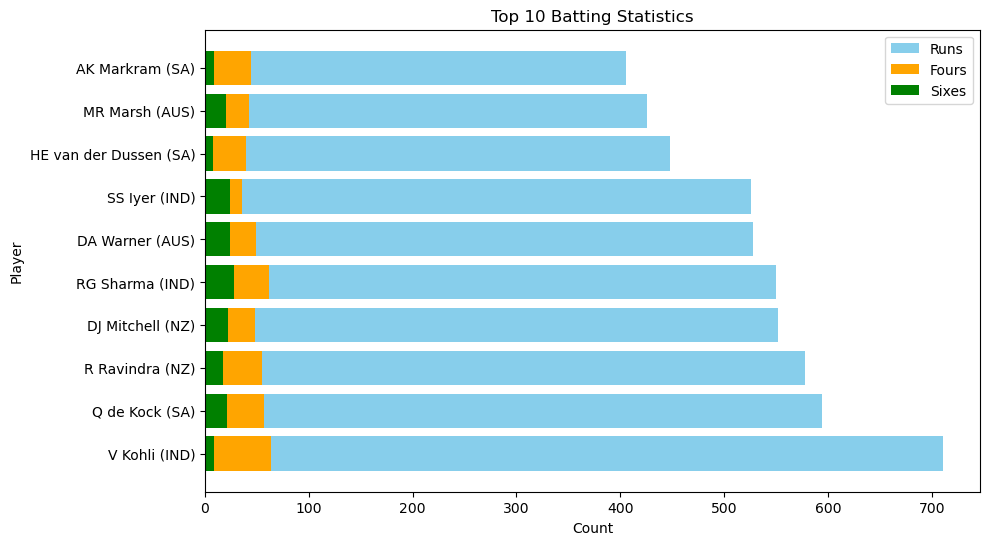

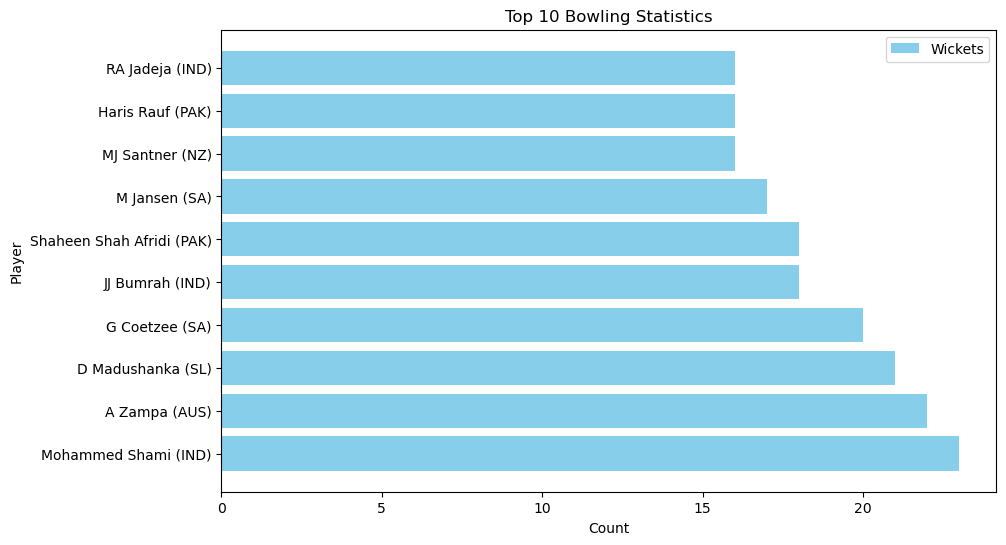

In [27]:
# Sort batting statistics by runs
top_batting_players = batting_statistics.sort_values(by='runs', ascending=False).head(10)

# Plotting top 10 batting statistics
plt.figure(figsize=(10, 6))
plt.barh(top_batting_players.index, top_batting_players['runs'], color='skyblue', label='Runs')
plt.barh(top_batting_players.index, top_batting_players['4s'], color='orange', label='Fours')
plt.barh(top_batting_players.index, top_batting_players['6s'], color='green', label='Sixes')
plt.xlabel('Count')
plt.ylabel('Player')
plt.title('Top 10 Batting Statistics')
plt.legend()
plt.show()

# Sort bowling statistics by wickets
top_bowling_players = bowling_statistics.sort_values(by='wkts', ascending=False).head(10)

# Plotting top 10 bowling statistics
plt.figure(figsize=(10, 6))
plt.barh(top_bowling_players.index, top_bowling_players['wkts'], color='skyblue', label='Wickets')
plt.xlabel('Count')
plt.ylabel('Player')
plt.title('Top 10 Bowling Statistics')
plt.legend()
plt.show()


***leading run-scorers and wicket-takers***

In [14]:
# Identify leading run-scorers
leading_run_scorers = df[df['bat_or_bowl'] == 'bat'].groupby('player')['runs'].sum().sort_values(ascending=False).head(10)

# Identify leading wicket-takers
leading_wicket_takers = df[df['bat_or_bowl'] == 'bowl'].groupby('player')['wkts'].sum().sort_values(ascending=False).head(10)

# Display the results
print("Leading Run-Scorers:")
print(leading_run_scorers)

print("\nLeading Wicket-Takers:")
print(leading_wicket_takers)


Leading Run-Scorers:
player
V Kohli (IND)             711
Q de Kock (SA)            594
R Ravindra (NZ)           578
DJ Mitchell (NZ)          552
RG Sharma (IND)           550
DA Warner (AUS)           528
SS Iyer (IND)             526
HE van der Dussen (SA)    448
MR Marsh (AUS)            426
AK Markram (SA)           406
Name: runs, dtype: int64

Leading Wicket-Takers:
player
Mohammed Shami (IND)         23.0
A Zampa (AUS)                22.0
D Madushanka (SL)            21.0
G Coetzee (SA)               20.0
JJ Bumrah (IND)              18.0
Shaheen Shah Afridi (PAK)    18.0
M Jansen (SA)                17.0
MJ Santner (NZ)              16.0
Haris Rauf (PAK)             16.0
RA Jadeja (IND)              16.0
Name: wkts, dtype: float64


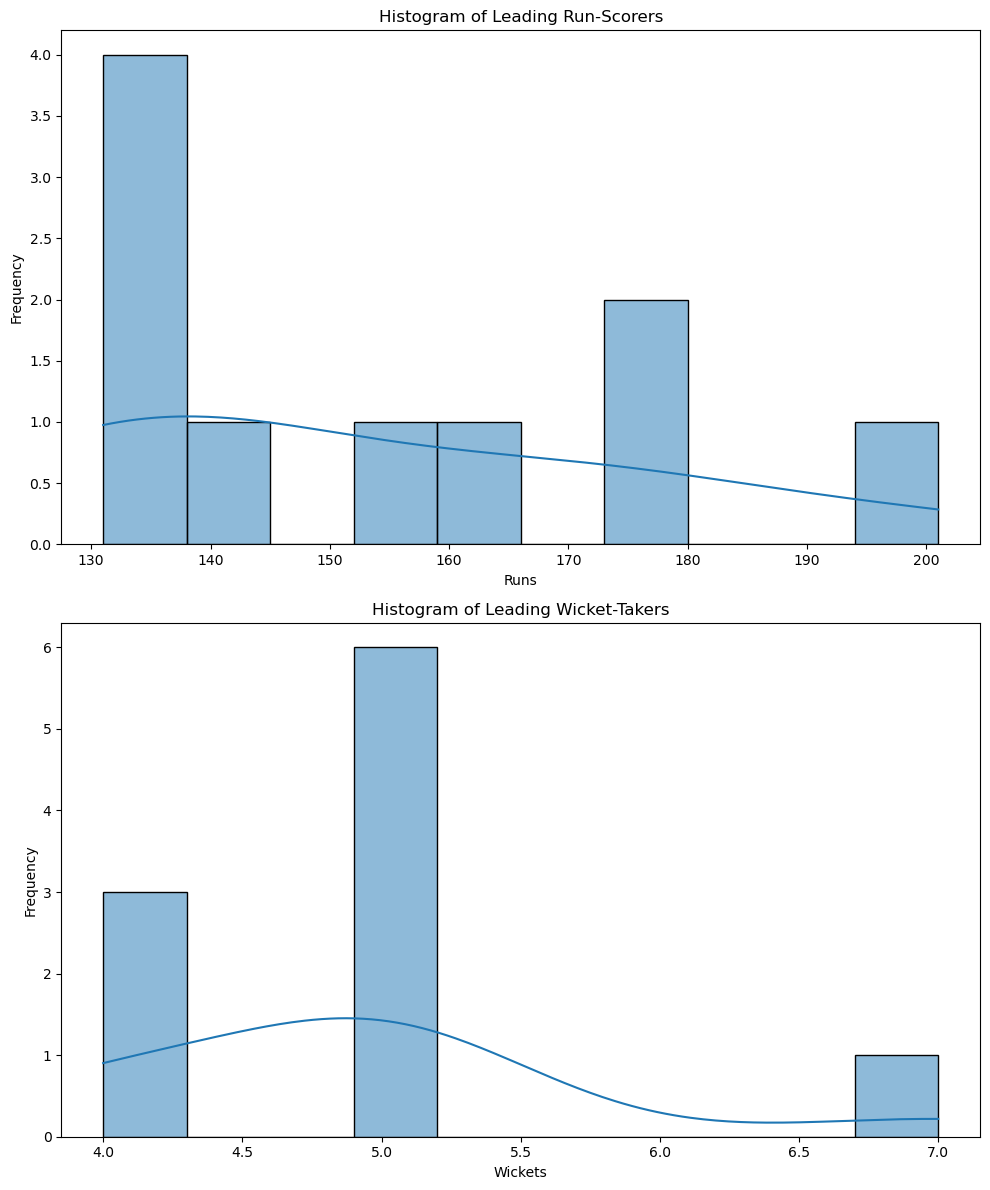

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot histogram for leading run-scorers
sns.histplot(data=leading_run_scorers, x='runs', bins=10, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Leading Run-Scorers')
axes[0].set_xlabel('Runs')
axes[0].set_ylabel('Frequency')

# Plot histogram for leading wicket-takers
sns.histplot(data=leading_wicket_takers, x='wkts', bins=10, kde=True, ax=axes[1])
axes[1].set_title('Histogram of Leading Wicket-Takers')
axes[1].set_xlabel('Wickets')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

***Assess the impact of players on their team's performance.***

In [22]:
# Evaluate individual player statistics for batting and bowling
batting_stats = df[df['bat_or_bowl'] == 'bat']
bowling_stats = df[df['bat_or_bowl'] == 'bowl']

# Identify leading run-scorers and wicket-takers
leading_run_scorers = batting_stats.sort_values(by='runs', ascending=False).head(10)
leading_wicket_takers = bowling_stats.sort_values(by='wkts', ascending=False).head(10)

# Assess the impact of players on their team's performance
player_contributions = pd.DataFrame(columns=['Player', 'Total_Runs', 'Total_Wickets'])

# Aggregate player contributions
for team, group in df.groupby('team'):
    player_contributions = player_contributions.append({
        'Player': group['player'].iloc[0],  # Assuming player names are unique within each team
        'Total_Runs': group['runs'].sum(),
        'Total_Wickets': group['wkts'].sum()
    }, ignore_index=True)

# Sort players by their total runs and wickets
sorted_contributions = player_contributions.sort_values(by=['Total_Runs', 'Total_Wickets'], ascending=False).head(15)
print("\nTop Contributors to Team's Performance:\n")
print(sorted_contributions)

warnings.filterwarnings("ignore")


Top Contributors to Team's Performance:

                      Player Total_Runs  Total_Wickets
6              MJ Henry (NZ)       5376           71.0
1              A Zampa (AUS)       5234           77.0
8             G Coetzee (SA)       5097           88.0
7  Shaheen Shah Afridi (PAK)       4786           65.0
4        Kuldeep Yadav (IND)       4783           94.0
3            DJ Willey (ENG)       4396           65.0
9          D Madushanka (SL)       4366           50.0
2   Mehidy Hasan Miraz (BAN)       4358           51.0
5          LV van Beek (NED)       4268           63.0
0           Noor Ahmad (AFG)       4134           53.0


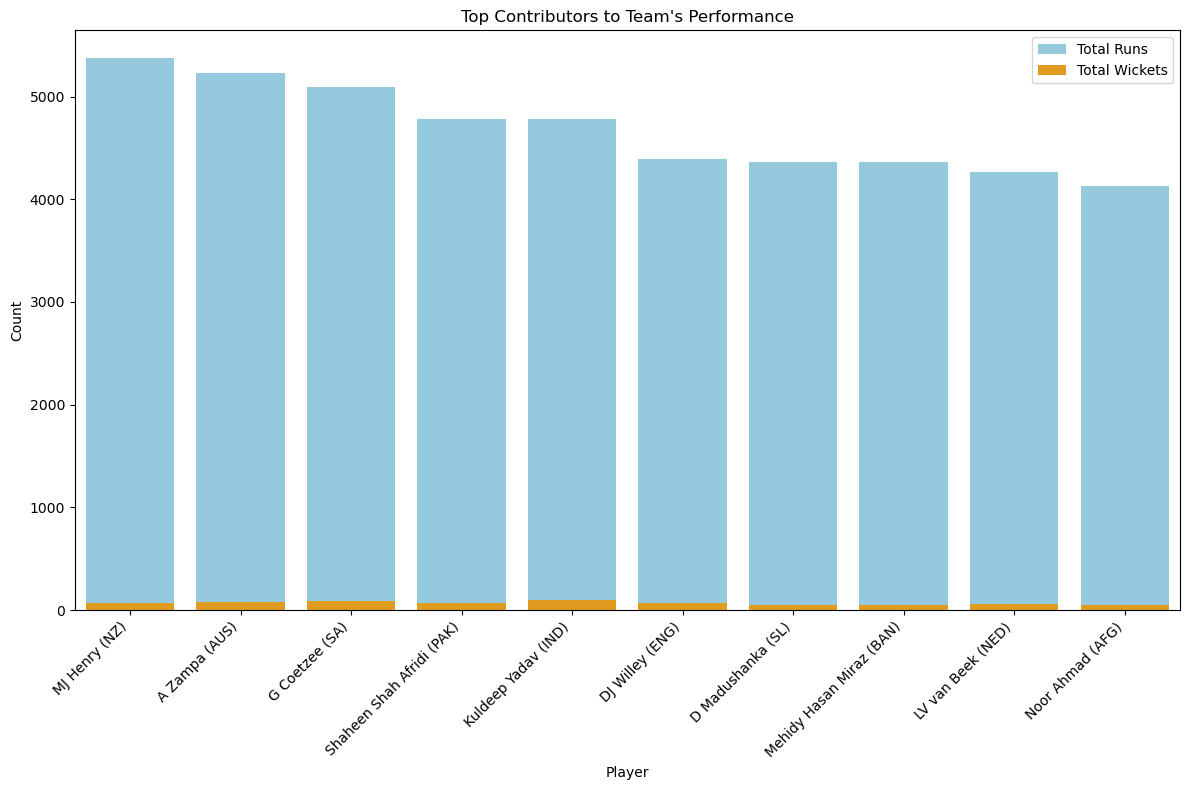

In [29]:
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(data=sorted_contributions, x='Player', y='Total_Runs', color='skyblue', label='Total Runs')
sns.barplot(data=sorted_contributions, x='Player', y='Total_Wickets', color='orange', label='Total Wickets')

# Add labels and title
plt.xlabel('Player')
plt.ylabel('Count')
plt.title('Top Contributors to Team\'s Performance')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Opposition and Ground Analysis

***Investigate how teams and players perform against different oppositions.***

In [16]:
# Team Performance against Different Oppositions
team_opposition_analysis = df.groupby(['team', 'opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bat_or_bowl': 'count'  # Number of matches played against each opposition
}).reset_index()

team_opposition_analysis['avg_runs_per_match'] = team_opposition_analysis['runs'] / team_opposition_analysis['bat_or_bowl']
team_opposition_analysis['avg_wickets_per_match'] = team_opposition_analysis['wkts'] / team_opposition_analysis['bat_or_bowl']

# Player Performance against Different Oppositions
player_opposition_analysis = df.groupby(['player', 'opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bat_or_bowl': 'count'  # Number of matches played against each opposition
}).reset_index()

player_opposition_analysis['avg_runs_per_match'] = player_opposition_analysis['runs'] / player_opposition_analysis['bat_or_bowl']
player_opposition_analysis['avg_wickets_per_match'] = player_opposition_analysis['wkts'] / player_opposition_analysis['bat_or_bowl']

# Display the results
print("Team Performance against Different Oppositions:")
print(team_opposition_analysis)

print("\nPlayer Performance against Different Oppositions:")
print(player_opposition_analysis)

Team Performance against Different Oppositions:
   team      opposition  runs  wkts  bat_or_bowl  avg_runs_per_match  \
0   AFG     v Australia   563   6.0           13           43.307692   
1   AFG    v Bangladesh   303   3.0           16           18.937500   
2   AFG       v England   480  10.0           17           28.235294   
3   AFG         v India   525   2.0           16           32.812500   
4   AFG   v Netherlands   346   6.0           11           31.454545   
..  ...             ...   ...   ...          ...                 ...   
86   SL         v India   391   6.0           17           23.000000   
87   SL   v Netherlands   495   9.0           13           38.076923   
88   SL   v New Zealand   339   4.0           16           21.187500   
89   SL      v Pakistan   675   4.0           17           39.705882   
90   SL  v South Africa   733   5.0           17           43.117647   

    avg_wickets_per_match  
0                0.461538  
1                0.187500  
2  

***Examine performance variations across different playing grounds.*** 

In [17]:
# Team Performance across Different Playing Grounds
team_ground_analysis = df.groupby(['team', 'ground']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bat_or_bowl': 'count'  # Number of matches played at each ground
}).reset_index()

team_ground_analysis['avg_runs_per_match'] = team_ground_analysis['runs'] / team_ground_analysis['bat_or_bowl']
team_ground_analysis['avg_wickets_per_match'] = team_ground_analysis['wkts'] / team_ground_analysis['bat_or_bowl']

# Player Performance across Different Playing Grounds
player_ground_analysis = df.groupby(['player', 'ground']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bat_or_bowl': 'count'  # Number of matches played at each ground
}).reset_index()

player_ground_analysis['avg_runs_per_match'] = player_ground_analysis['runs'] / player_ground_analysis['bat_or_bowl']
player_ground_analysis['avg_wickets_per_match'] = player_ground_analysis['wkts'] / player_ground_analysis['bat_or_bowl']

# Display the results
print("Team Performance across Different Playing Grounds:")
print(team_ground_analysis)

print("\nPlayer Performance across Different Playing Grounds:")
print(player_ground_analysis)


Team Performance across Different Playing Grounds:
   team      ground  runs  wkts  bat_or_bowl  avg_runs_per_match  \
0   AFG   Ahmedabad   473   5.0           18           26.277778   
1   AFG     Chennai   973  13.0           27           36.037037   
2   AFG       Delhi  1005  12.0           33           30.454545   
3   AFG  Dharamsala   303   3.0           16           18.937500   
4   AFG     Lucknow   346   6.0           11           31.454545   
..  ...         ...   ...   ...          ...                 ...   
67   SL       Delhi  1274  12.0           33           38.606061   
68   SL   Hyderabad   675   4.0           17           39.705882   
69   SL     Lucknow   906  13.0           29           31.241379   
70   SL        Pune   471   3.0           16           29.437500   
71   SL    Wankhede   391   6.0           17           23.000000   

    avg_wickets_per_match  
0                0.277778  
1                0.481481  
2                0.363636  
3                0.1

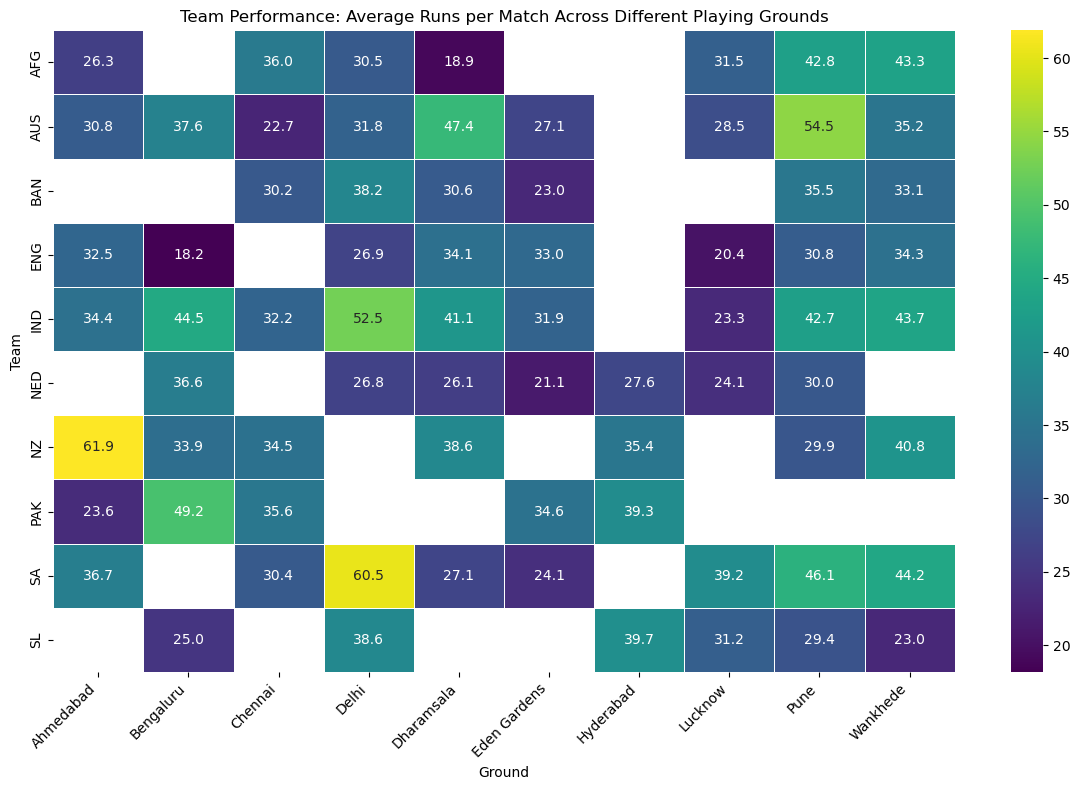

In [34]:
# Pivot the team_ground_analysis DataFrame to prepare for heatmap
team_ground_pivot = team_ground_analysis.pivot(index='team', columns='ground', values='avg_runs_per_match')

# Create heatmap for average runs per match
plt.figure(figsize=(12, 8))
sns.heatmap(team_ground_pivot, cmap='viridis', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Team Performance: Average Runs per Match Across Different Playing Grounds')
plt.xlabel('Ground')
plt.ylabel('Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


***Identify if there are specific teams or players that excel in certain conditions.***

In [18]:
# Team Performance against Different Oppositions
team_opposition_analysis = df.groupby(['team', 'opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bat_or_bowl': 'count'  # Number of matches played against each opposition
}).reset_index()

team_opposition_analysis['avg_runs_per_match'] = team_opposition_analysis['runs'] / team_opposition_analysis['bat_or_bowl']
team_opposition_analysis['avg_wickets_per_match'] = team_opposition_analysis['wkts'] / team_opposition_analysis['bat_or_bowl']

# Player Performance against Different Oppositions
player_opposition_analysis = df.groupby(['player', 'opposition']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bat_or_bowl': 'count'  # Number of matches played against each opposition
}).reset_index()

player_opposition_analysis['avg_runs_per_match'] = player_opposition_analysis['runs'] / player_opposition_analysis['bat_or_bowl']
player_opposition_analysis['avg_wickets_per_match'] = player_opposition_analysis['wkts'] / player_opposition_analysis['bat_or_bowl']

# Identify Teams Excelling against Specific Oppositions
teams_excelling_opposition = team_opposition_analysis.sort_values(by='avg_runs_per_match', ascending=False).head(10)
# You can also analyze wickets data similarly

# Identify Players Excelling against Specific Oppositions
players_excelling_opposition = player_opposition_analysis.sort_values(by='avg_runs_per_match', ascending=False).head(10)
# You can also analyze wickets data similarly

# Display the results
print("Teams Excelling against Specific Oppositions:")
print(teams_excelling_opposition)

print("\nPlayers Excelling against Specific Oppositions:")
print(players_excelling_opposition)

Teams Excelling against Specific Oppositions:
   team     opposition  runs  wkts  bat_or_bowl  avg_runs_per_match  \
70  PAK  v New Zealand   589   6.0            9           65.444444   
58   NZ      v England   557   9.0            9           61.888889   
81   SA    v Sri Lanka   726  10.0           12           60.500000   
6   AFG     v Pakistan   555   7.0           10           55.500000   
72  PAK    v Sri Lanka   659   9.0           12           54.916667   
10  AUS   v Bangladesh   599   5.0           11           54.454545   
36  IND  v Afghanistan   525   8.0           10           52.500000   
41  IND  v New Zealand  1241  19.0           24           51.708333   
75   SA   v Bangladesh   603  10.0           12           50.250000   
14  AUS  v New Zealand   758   8.0           16           47.375000   

    avg_wickets_per_match  
70               0.666667  
58               1.000000  
81               0.833333  
6                0.700000  
72               0.750000  
10  

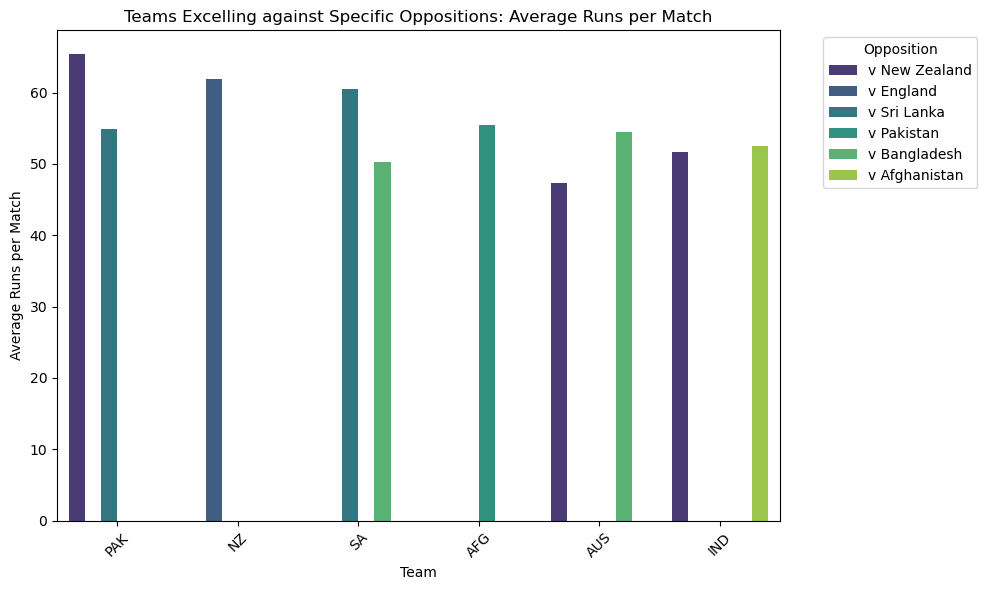

In [40]:
# Plot for Team Performance against Different Oppositions
plt.figure(figsize=(10, 6))
sns.barplot(data=teams_excelling_opposition, x='team', y='avg_runs_per_match', hue='opposition', palette='viridis')
plt.title('Teams Excelling against Specific Oppositions: Average Runs per Match')
plt.xlabel('Team')
plt.ylabel('Average Runs per Match')
plt.xticks(rotation=45)
plt.legend(title='Opposition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


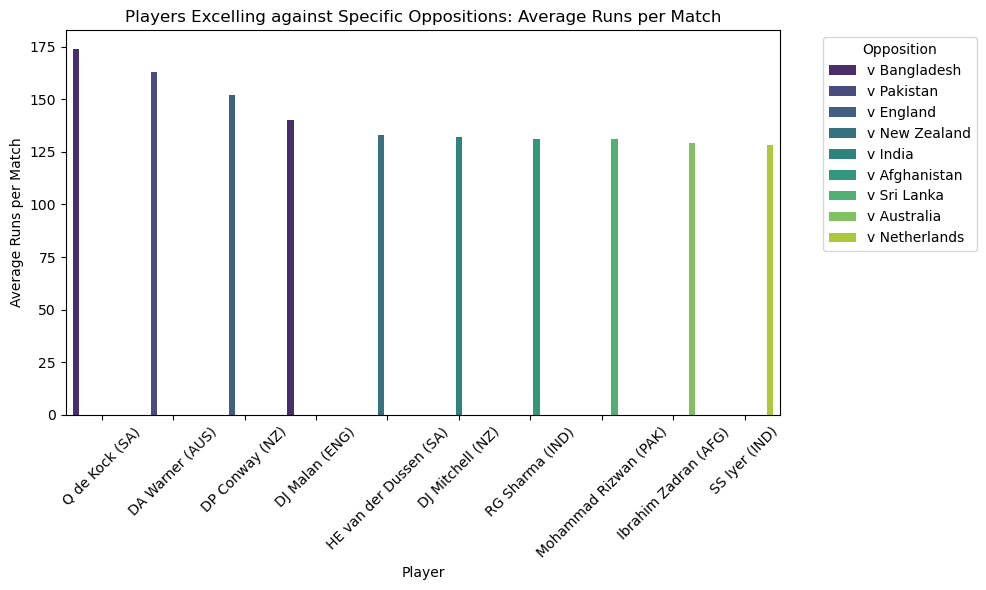

In [41]:
# Plot for Player Performance against Different Oppositions
plt.figure(figsize=(10, 6))
sns.barplot(data=players_excelling_opposition, x='player', y='avg_runs_per_match', hue='opposition', palette='viridis')
plt.title('Players Excelling against Specific Oppositions: Average Runs per Match')
plt.xlabel('Player')
plt.ylabel('Average Runs per Match')
plt.xticks(rotation=45)
plt.legend(title='Opposition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Temporal Analysis

***Study performance trends over time, considering start dates and overs played***

In [19]:
# Temporal Analysis for Team Performance
team_temporal_analysis = df.groupby(['start_date', 'team']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'overs': 'sum'  # Total overs played
}).reset_index()

# Temporal Analysis for Player Performance
player_temporal_analysis = df.groupby(['start_date','player']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'overs': 'sum'  # Total overs played
}).reset_index()

# Identify any temporal patterns or changes in team and player performance
# You can visualize the trends using plots or perform statistical analysis

# Display the results
print()
print("Temporal Analysis for Team Performance:")
print()
print(team_temporal_analysis)

print("\nTemporal Analysis for Player Performance:")
print()
print(player_temporal_analysis)



Temporal Analysis for Team Performance:

   start_date team  runs  wkts  overs
0    1-Nov-23   NZ   508   4.0   49.6
1    1-Nov-23   SA   507  10.0   35.3
2   10-Nov-23  AFG   473   5.0   47.3
3   10-Nov-23   SA   477   9.0   49.6
4   10-Oct-23  BAN   581   9.0   50.0
..        ...  ...   ...   ...    ...
89   8-Oct-23  IND   386  10.0   49.3
90   9-Nov-23   NZ   340  10.0   46.4
91   9-Nov-23   SL   339   4.0   23.2
92   9-Oct-23  NED   538   7.0   50.0
93   9-Oct-23   NZ   531   9.0   46.3

[94 rows x 5 columns]

Temporal Analysis for Player Performance:

     start_date                 player  runs  wkts  overs
0      1-Nov-23        AK Markram (SA)     6   0.0    0.0
1      1-Nov-23         DA Miller (SA)    53   0.0    0.0
2      1-Nov-23       DJ Mitchell (NZ)    24   0.0    0.0
3      1-Nov-23         DP Conway (NZ)     2   0.0    0.0
4      1-Nov-23         G Coetzee (SA)    41   2.0    6.3
...         ...                    ...   ...   ...    ...
1012   9-Oct-23   SA Engelbre

***Changes in team and player performance.***

In [20]:
# Convert 'start_date' to datetime format
df['start_date'] = pd.to_datetime(df['start_date'])

# Aggregate performance metrics for teams and players based on start dates
team_performance_over_time = df.groupby(['team', 'start_date']).agg({
    'runs': 'sum',
    'wkts': 'sum',
}).reset_index()

player_performance_over_time = df.groupby(['player', 'start_date']).agg({
    'runs': 'sum',
    'wkts': 'sum',
}).reset_index()

print('*******Team Performance Over Time********')
print('')
print(team_performance_over_time)
print('')
print('*******Player Performance Over Time********')
print('')
print(player_performance_over_time)

*******Team Performance Over Time********

   team start_date  runs  wkts
0   AFG 2023-10-07   303   3.0
1   AFG 2023-10-11   525   2.0
2   AFG 2023-10-15   480  10.0
3   AFG 2023-10-18   418   6.0
4   AFG 2023-10-23   555   7.0
..  ...        ...   ...   ...
89   SL 2023-10-26   310   8.0
90   SL 2023-10-30   471   3.0
91   SL 2023-11-02   391   6.0
92   SL 2023-11-06   541   7.0
93   SL 2023-11-09   339   4.0

[94 rows x 4 columns]

*******Player Performance Over Time********

             player start_date  runs  wkts
0      A Dutt (NED) 2023-10-06    49   1.0
1      A Dutt (NED) 2023-10-09    73   2.0
2      A Dutt (NED) 2023-10-17    42   0.0
3      A Dutt (NED) 2023-10-21    53   3.0
4      A Dutt (NED) 2023-10-25    60   1.0
...             ...        ...   ...   ...
1012  WA Young (NZ) 2023-10-09    70   0.0
1013  WA Young (NZ) 2023-10-18    54   0.0
1014  WA Young (NZ) 2023-10-22    17   0.0
1015  WA Young (NZ) 2023-10-28    32   0.0
1016  WA Young (NZ) 2023-11-01    33   0.0


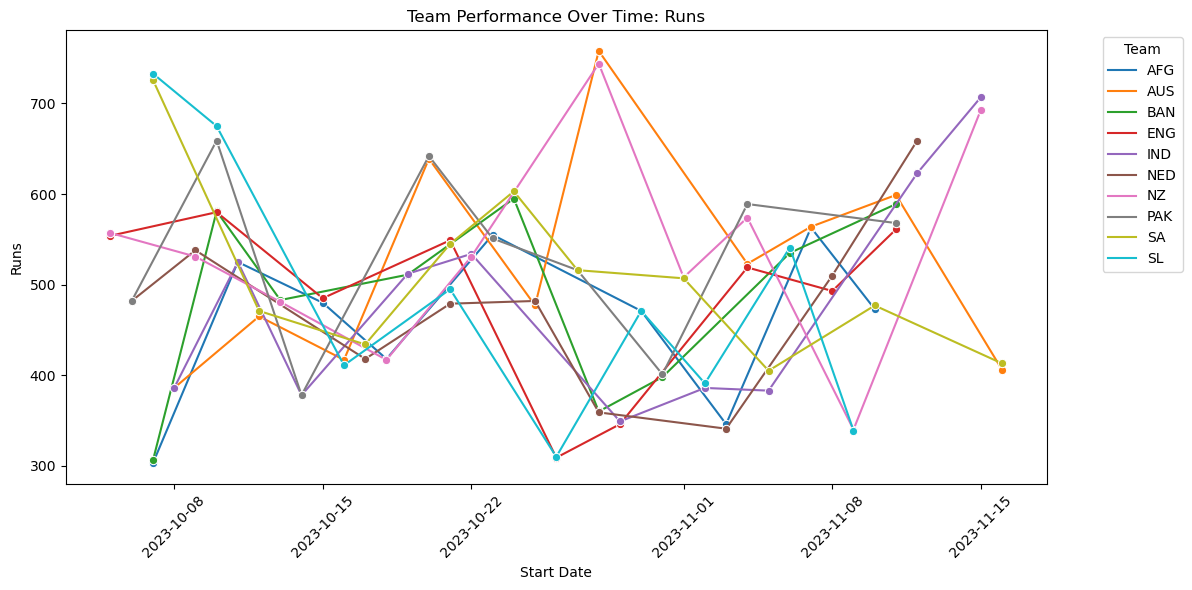

In [43]:
# Plot for Team Performance Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=team_performance_over_time, x='start_date', y='runs', hue='team', marker='o')
plt.title('Team Performance Over Time: Runs')
plt.xlabel('Start Date')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


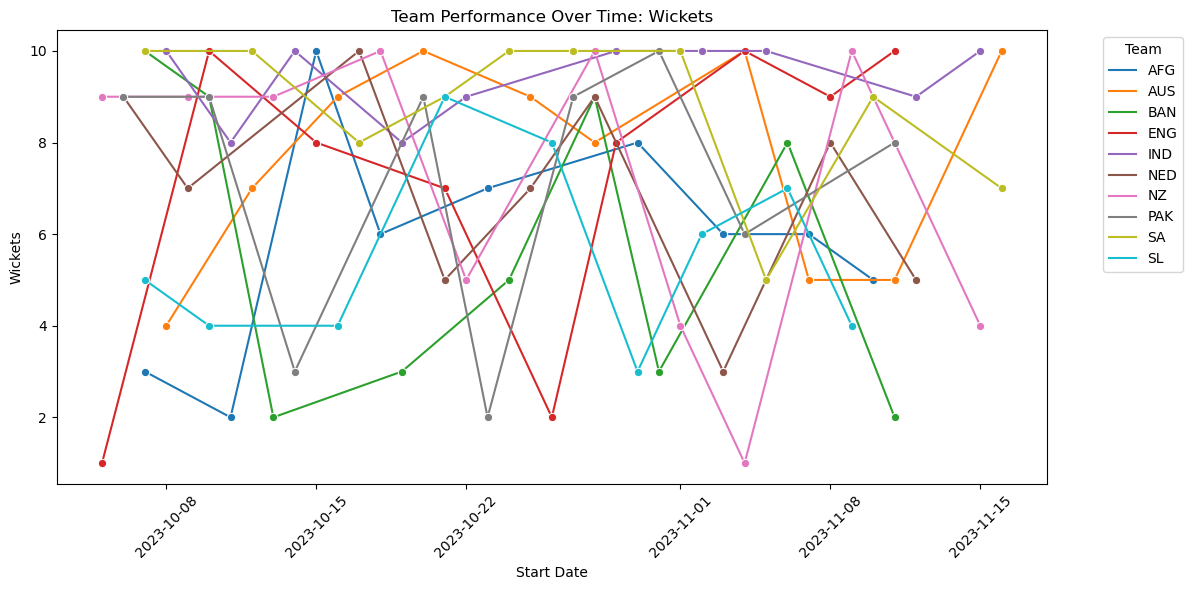

In [44]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=team_performance_over_time, x='start_date', y='wkts', hue='team', marker='o')
plt.title('Team Performance Over Time: Wickets')
plt.xlabel('Start Date')
plt.ylabel('Wickets')
plt.xticks(rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Dataset Overview

***Compare Dataset***

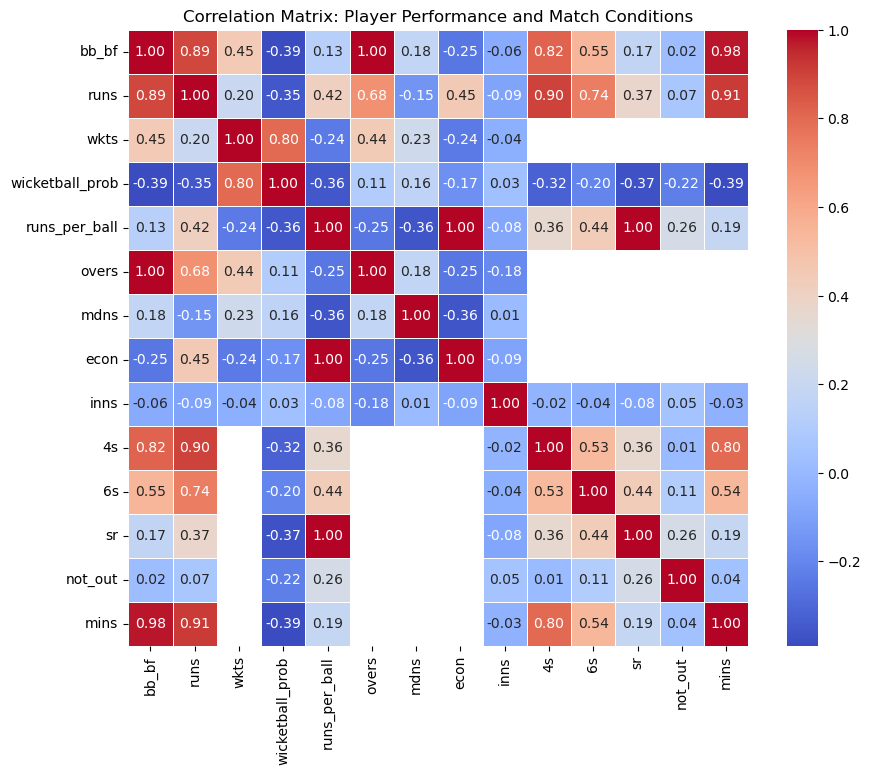

In [21]:
df1=df.select_dtypes(include=[int,float])
columns_of_interest =df1.columns
selected_data = df1[columns_of_interest]

# Convert date to datetime format
#selected_data['start_date'] = pd.to_datetime(selected_data['start_date'])

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Player Performance and Match Conditions')
plt.show()